In [1]:
import os

import h5py

import numpy as np

import corner

import matplotlib.pyplot as plt

In [14]:
def plot_posteriors():

    home = os.getcwd()
    figs = f'{home}/figs'
    results = f'{home}/results'

    # Make prefix strings for the different sets of EW measurements, to be used in the loop below
    stem = 'JADES_z6to9LBGcatalog_Endsley2024_f775w_dropouts_beagle_csfh_fits_probs'
    prefixes = [stem, f'{stem}_m_uv_endsley2024']

    m_uv_bins = ['bright', 'faint', 'vfaint']

    for prefix in prefixes:

        for m_uv_bin in m_uv_bins:

            with h5py.File(f'{results}/probs/{prefix}_{m_uv_bin}.h5', 'a') as f:

                means = 10**f['posteriors']['means'][:]# + np.log10(7)
                variances = np.sqrt(f['posteriors']['variances'][:])
                probabilities = f['posteriors']['probabilities'][:]

                probabilities = np.exp(probabilities - np.max(probabilities))

                #probabilites = probabilities / np.sum(probabilities)

                samples = np.vstack([means,variances]).T
                #print(len(probabilities))
                #print(len(probabilities[np.isnan(probabilities)]))
                #print(samples)
                #print(probabilities)
                fig = corner.corner(samples, weights=probabilities, labels=['$\mu$', '$\sigma$'], show_titles=True)

                fig.supxlabel('Test')

                fig.savefig(f'{figs}/{prefix}_log_normal_posterior_{m_uv_bin}.pdf', bbox_inches='tight')

                #corner.corner.savefig(f'{results}/oiii_ew_distribution_log_normal_fit_posteriors.pdf')

def plot_distributions():

    def gaussian(x, mean, stdv):

        y = (1 / (stdv * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) / stdv)**2 / 2)

        return y

    home = os.getcwd()
    results = f'{home}/results'

    names = ['bright', 'faint', 'vfaint']

    fig, ax = plt.subplots()

    for name in names:

        with h5py.File(f'{results}/probs/endsley2024_f775w_dropouts_beagle_csfh_fits_probs_{name}.h5', 'a') as f:

            means = 10**f['posteriors']['means'][:]# + np.log10(7)
            variances = np.sqrt(f['posteriors']['variances'][:])
            probabilities = f['posteriors']['probabilities'][:]

            probabilities = np.exp(probabilities - np.max(probabilities))

            #probabilites = probabilities / np.sum(probabilities)

            samples = np.vstack([means,variances]).T

            #corner.corner(samples, weights=probabilities, labels=['Mean', 'Standard deviation'], show_titles=True)

            ews_angstrom_log10 = 10**(np.arange(0, 4, 0.01))[:,np.newaxis]
            means = means[np.newaxis,:]
            stdv = np.sqrt(variances)[np.newaxis,:]

            ps = gaussian(ews_angstrom_log10, means, stdv)
            print(np.shape(ps))
            print(np.mean(ps, axis=1))

            weighted = np.sum(ps * probabilities, axis=1) / np.sum(probabilities)
            print(weighted)

            ax.plot(ews_angstrom_log10, weighted, label=name)
            #ax.plot(ews_angstrom_log10, np.dot(ps, probabilities), label=name)
            #ax.plot(ews_angstrom_log10, gaussian(10**np.arange(0, 4, 0.01), np.dot(means, probabilities), np.dot(np.sqrt(variances), probabilities)), label=name)

    ax.legend(loc='upper right')

    ax.set_xscale('log')

    #ax.set_xlim(10**2.5, 10**3.7)

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\s'
/var/folders/md/b3rxd7_x6zgd55s__25hxcwh0000gn/T/ipykernel_58301/1133097691.py:32: SyntaxWarning: invalid escape sequence '\m'
  fig = corner.corner(samples, weights=probabilities, labels=['$\mu$', '$\sigma$'], show_titles=True)
/var/folders/md/b3rxd7_x6zgd55s__25hxcwh0000gn/T/ipykernel_58301/1133097691.py:32: SyntaxWarning: invalid escape sequence '\s'
  fig = corner.corner(samples, weights=probabilities, labels=['$\mu$', '$\sigma$'], show_titles=True)


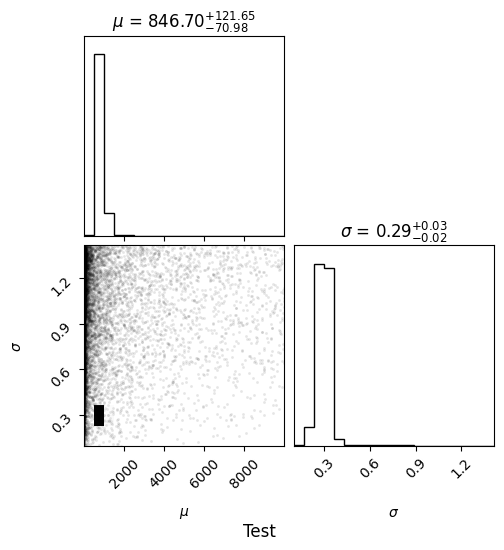

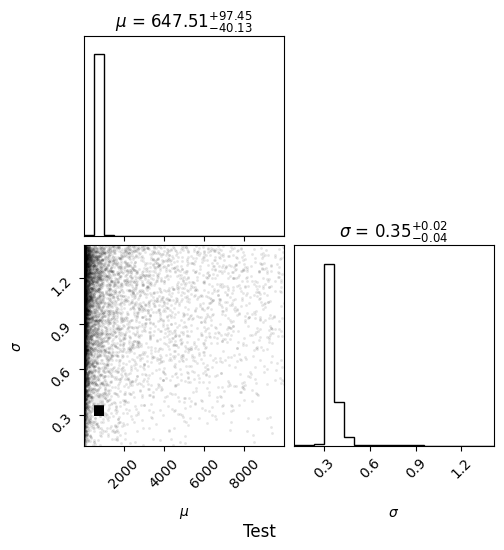

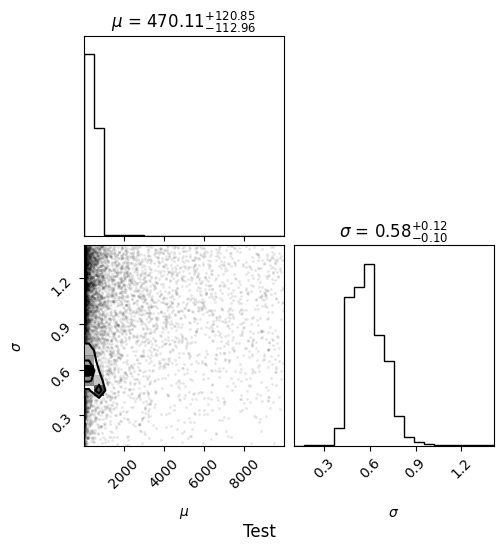

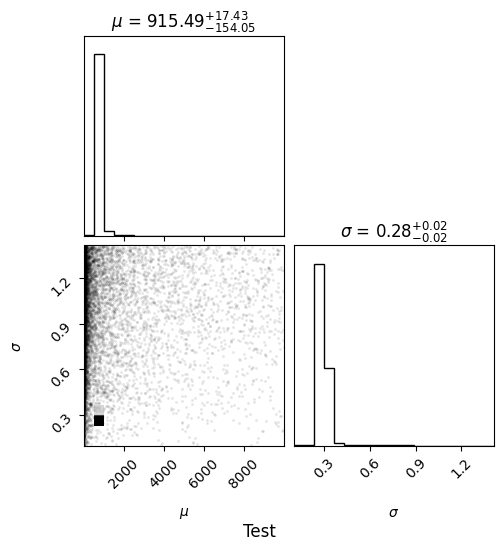

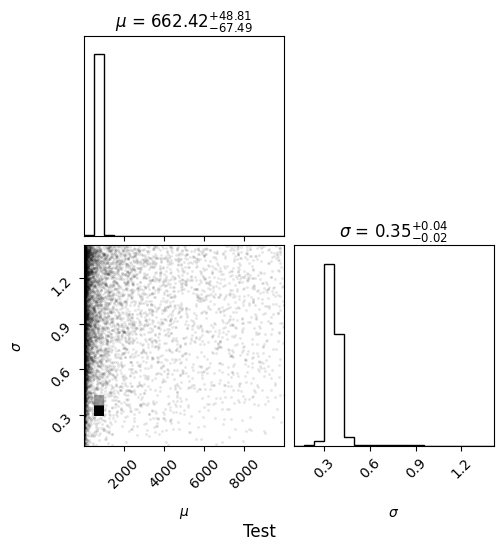

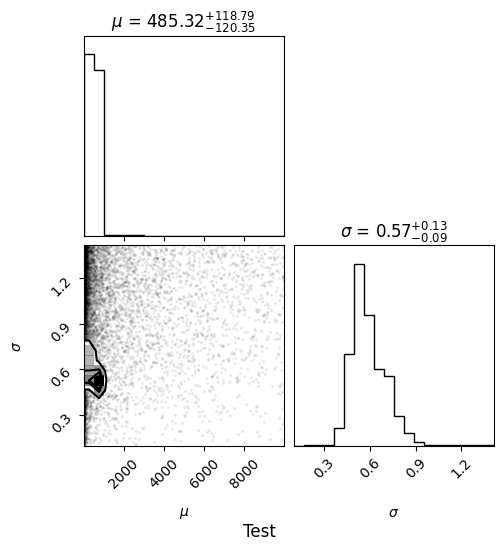

In [15]:
plot_posteriors()

(400, 10000)
[3.42147792e-02 3.47732625e-02 3.53361596e-02 3.59024067e-02
 3.64708337e-02 3.70401640e-02 3.76090149e-02 3.81758994e-02
 3.87392301e-02 3.92973249e-02 3.98484136e-02 4.03906478e-02
 4.09221113e-02 4.14408328e-02 4.19447999e-02 4.24319740e-02
 4.29003059e-02 4.33477516e-02 4.37722879e-02 4.41719267e-02
 4.45447280e-02 4.48888114e-02 4.52023647e-02 4.54836516e-02
 4.57310166e-02 4.59428896e-02 4.61177902e-02 4.62543332e-02
 4.63512368e-02 4.64073331e-02 4.64215846e-02 4.63931023e-02
 4.63211681e-02 4.62052555e-02 4.60450489e-02 4.58404540e-02
 4.55916005e-02 4.52988334e-02 4.49626966e-02 4.45839169e-02
 4.41633967e-02 4.37022297e-02 4.32017492e-02 4.26636088e-02
 4.20898873e-02 4.14831869e-02 4.08466851e-02 4.01840940e-02
 3.94994928e-02 3.87970296e-02 3.80805295e-02 3.73530922e-02
 3.66167871e-02 3.58725567e-02 3.51203974e-02 3.43598241e-02
 3.35905439e-02 3.28131932e-02 3.20299490e-02 3.12448192e-02
 3.04634589e-02 2.96924467e-02 2.89380927e-02 2.82050085e-02
 2.74948149

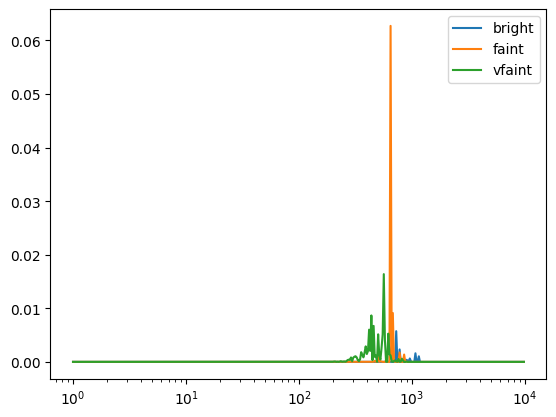

In [4]:
plot_distributions()